In [1]:
%matplotlib inline

In [35]:
import sys
sys.path.append("..")
from function.core_dict import DictModel
from function.utility import ProjectPath
import matplotlib.pyplot as plt

In [3]:
UP_LIMIT = 1000

# mono-gram词频统计

In [27]:
word_freq = DictModel()
word_freq.LoadFrom('times_0.json')

---- LoadFrom ----
|| LoadFrom :     [0.01 s ]


In [28]:
items = word_freq.items()
items.sort()

x = [index for index,value in items if index<1000 and isinstance(index,int)]
y = [value for index,value in items if index<1000 and isinstance(index,int)]

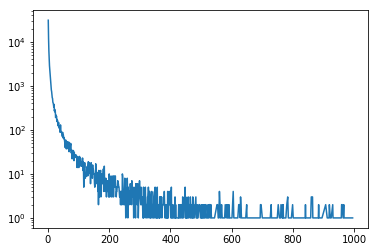

In [29]:
fig = plt.figure()
ay = fig.add_subplot(111)
ay.set_yscale("log")
plt.plot(x,y)

# bi-gram词频统计

In [30]:
word_freq = DictModel()
word_freq.LoadFrom('times_1.json')

---- LoadFrom ----
|| LoadFrom :     [0.05 s ]


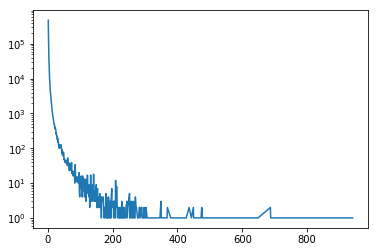

In [31]:
items = word_freq.items()
items.sort()

x = [index for index,value in items if index<1000 and isinstance(index,int)]
y = [value for index,value in items if index<1000 and isinstance(index,int)]

fig = plt.figure()
ay = fig.add_subplot(111)
ay.set_yscale("log")
plt.plot(x,y)

# 样本概率分布

In [157]:
import os
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
DataPath = os.path.join(ProjectPath(),'data')

变量

In [158]:
all_data = []
all_name = ['positive.csv','negative_1.csv','negative_2.csv']
color_name = ['b','g','r']

载入数据

In [159]:
for i in xrange(len(all_name)):
    statistics = pd.read_csv(os.path.join(DataPath,all_name[i]),header=None)
    statistics.columns = ['news','logP','words','missing']
    all_data.append(statistics)

根据正样本万分点设立阈值

In [160]:
thres_x = []
thres_y = []
for i in xrange(40):
    positive_length_i = all_data[0].logP[all_data[0].words == i]
    if positive_length_i.shape[0]< 1000:
        continue
    else:
        thres_x.append(i)
        thres_y += list(positive_length_i.describe([0.0001])['0.01%':'0.01%'])

w,b = np.polyfit(thres_x,thres_y,1)
thres_x = []
thres_y = []
for i in xrange(2,40):
    thres_x.append(i)
    thres_y.append(w*i+b)

生成图片并保存

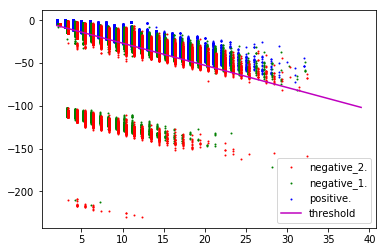

In [179]:
ax = plt.subplot(1,1,1)
for i,color in enumerate(color_name):
    ax.scatter(all_data[i].words+0.2*i,all_data[i].logP,c = color,s = 1, label=all_name[i].encode('utf-8')[:-3])
ax.plot(thres_x,thres_y,c = 'm', label= 'threshold')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
plt.savefig("threshold.png") 
plt.show()

In [180]:
print([w,b])

[-2.5864151209658113, -0.97022889343827634]
